# Finančna analiza največjih podjetij na svetu

Za projektno nalogo pri predmetu _Uvod v programiranje_ sem se odločil analizirati podatke največjih podjetij na svetu. Za analizo sem uporabil spletno stran [companiesmarketcap.com](https://companiesmarketcap.com/eur/).
Velikost podjteja, oz. v našem primeru delniška družba, je merjena s njeno tržno vrednostjo.
Pogledali si bomo podatke o tržni kapitalizaciji podjetij, njihov prihodek, dobiček, število zaposlenih, dividende in kazalnikom P/E.

## Pojmi

Med branjem se bomo srečali z različnimi finančnimi pojmi, zato bom jih za lažje razumevanje na kratko razložil:

- **Tržna kapitalizacija podjetja (Market Cap)**: Vrednost podjetja na borzi. V večini primerov jo lahko enostavno izračunamo z množenjem cene delnice s številom izdanih delnic.
- **Dobiček (Earnings)**: Razlika med prihodki in stroški podjetja v določenem obdobju.
- **Prihodek (Revenue)**: Skupen znesek denarja, ki ga podjetje pridobi iz svoje poslovne dejavnosti.
- **Kazalnik P/E (P/E ratio)**: Razmerje med ceno delnice in dobičkom na delnico, ki kaže koliko so vlagatelji pripravljeni plačati za eno enoto dobička.
- **Dividende**: Del dobička podjetja, ki se izplača delničarjem kot nagrada za njihovo naložbo.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Izpišejo se največ 20kaj  strani razpredlnice
pd.set_option("display.max_rows", 20)

podjetja = pd.read_csv("podatki/vse_kategorije.csv", index_col="id") 
trzna_kap = pd.read_csv("podatki/trzna_kap.csv", index_col="id")

def formatiraj(x):
    """Funkcija formatira velike številke"""
    x = float(x)
    if x >= 10**12:
        return f"{x/10**12:.2f} T" #:.2 zaokroži na dve decimalni mesti
    elif x >= 10**9:
        return f"{x/10**9:.2f} B"
    else:
        return f"{x/10**6:.2f} M"

## Katera so največja podjetja po tržni kapitalizaciji?
Prvo si poglejmo 20 največjih podjetji na svetu

In [62]:
top20 = podjetja.sort_values("marketcap", ascending=False).head(20)
top20["marketcap_formatiran"] = top20["marketcap"].apply(formatiraj) # v tabelo doda nov stolpec formatiranih števil
top20[["name", "country", "marketcap_formatiran"]]

,name,country,marketcap_formatiran
id,,,
29,NVIDIA,USA,3.76 T
1,Microsoft,USA,3.24 T
2,Apple,USA,2.96 T
4,Alphabet (Google),USA,2.20 T
3,Amazon,USA,2.12 T
72379,Meta Platforms (Facebook),USA,1.62 T
558,Saudi Aramco,S. Arabia,1.31 T
58,Broadcom,USA,1.24 T
17,TSMC,Taiwan,1.06 T


Vidimo, da na vrhu imamo večina tehnološke gigante. Med njimi so NVIDIA, Microsoft, Apple, Google, Amazon, Facebook in Tesla, katere so dobile vzdevek _The Magnificent Seven_, zaradi njihovega ogramnega vpliva na trg delnic in rekordne rasti.

Hitro opazimo, da je v top 20 večina ameriških podjetji. Pa si poglejmo kolikšen delež top 10000 podjetij predstavljajo ameriška podjetja.

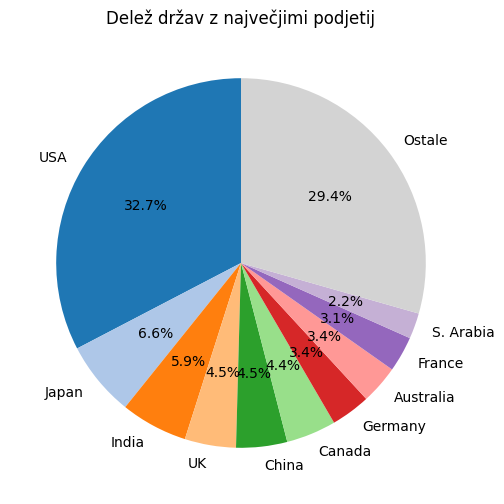

In [63]:
drzave = trzna_kap["country"].value_counts()
top_n = 10
labels = list(drzave.index[:top_n]) + ["Ostale"]
sizes = list(drzave.values[:top_n]) + [drzave.values[top_n:].sum()]
colors = plt.cm.tab20.colors[:top_n] + ("lightgray",)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Delež držav z največjimi podjetij")
plt.show()

Vidimo, da ZDA predstavlja več kot 30 % največjih podjetij. Posamezen delelež drugih držav je precej manjši od ZDA. 

Da bi boljše razumeli kako zares velika so največja podjetja med največjimi si poglejmo naslednji graf.

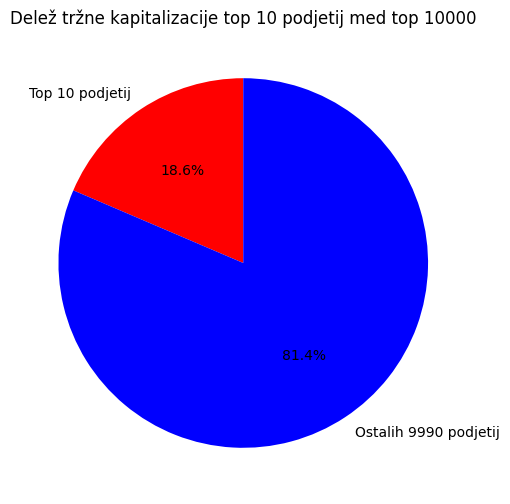

In [81]:
top10000 = podjetja.sort_values("marketcap", ascending=False).head(10000)
skupna_10000 = top10000["marketcap"].sum()
skupna_10 = top10000.head(10)["marketcap"].sum()

sizes = [skupna_10, skupna_10000 - skupna_10]
labels = ["Top 10 podjetij", "Ostalih 9990 podjetij"]
colors = ["red", "blue"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Delež tržne kapitalizacije top 10 podjetij med top 10000")
plt.show()

## Prihodek in dobiček podjetij
Sedaj si poglejmo podjetja z največjim prihodkom.

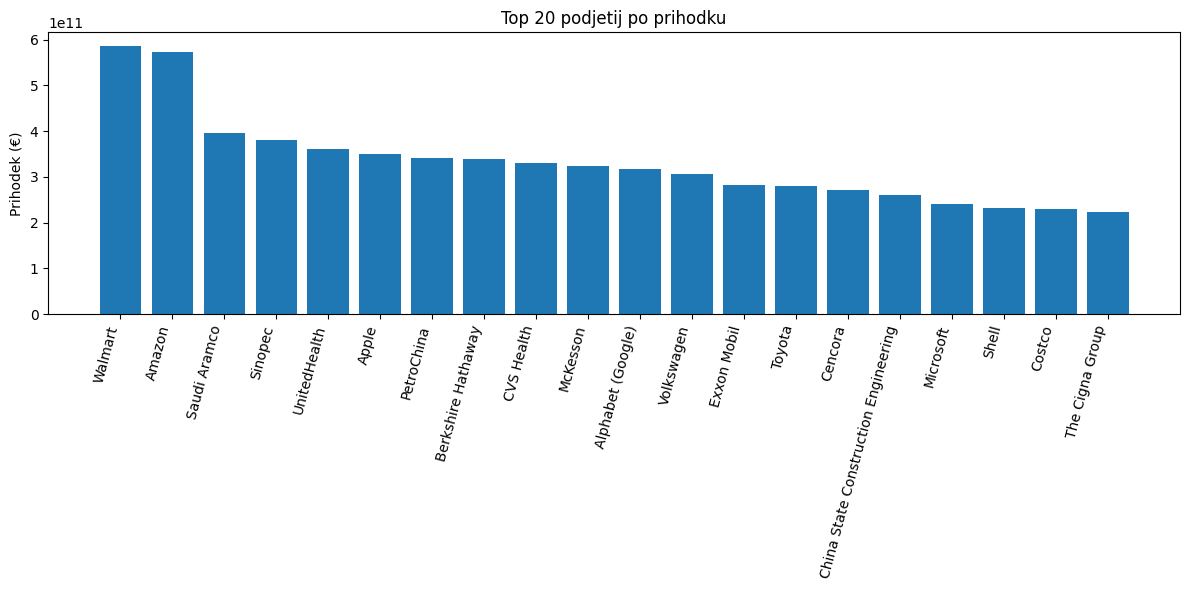

In [84]:
top20_revenue = podjetja.sort_values("revenue", ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(top20_revenue["name"], top20_revenue["revenue"])
plt.xticks(rotation=75, ha="right")
plt.ylabel("Prihodek (€)")
plt.title("Top 20 podjetij po prihodku")
plt.tight_layout()
plt.show()

Tukaj pa niso samo tehnološki giganti, ampak so podjetja iz različnih panog.

Lahko bi se vprašali ali podjetja z največjim prihodkom imajo tudi največji dobiček.

In [ ]:
top1000_revenue = podjetja.sort_values("revenue", ascending=False).head(1000)
top1000_earnings = podjetja.sort_values("earnings", ascending=False).head(1000)
# Poišči skupna podjetja
skupna_podjetja_1000 = set(top1000_revenue["name"]) & set(top1000_earnings["name"])

print(f"Od top 1000 podjetij po prihodku jih je {len(skupna_podjetja_1000)} tudi v top 1000 po dobičku.")

Od top 1000 podjetij po prihodku jih je 526 tudi v top 1000 po dobičku.


Kaj pa ali sta povezana prihodek podjetja in število zaposlenih v podjetju?

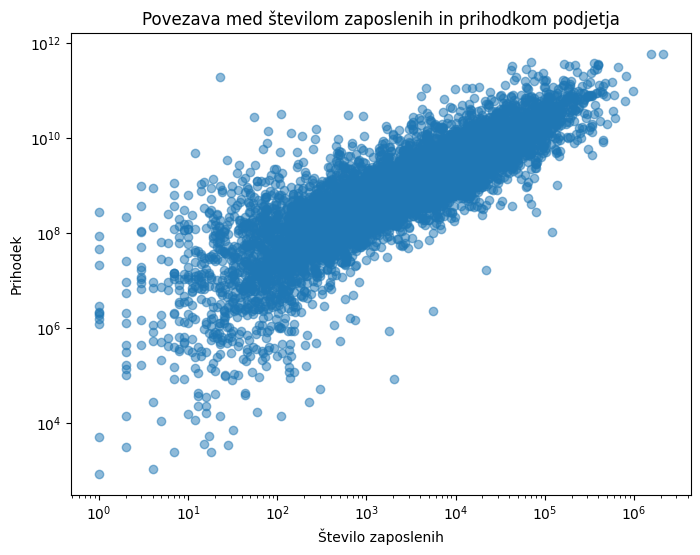

In [ ]:
podjetja["employees"] = pd.to_numeric(podjetja["employees"], errors="coerce")
podjetja["revenue"] = pd.to_numeric(podjetja["revenue"], errors="coerce")
podjetja_emp = podjetja.dropna(subset=["employees", "revenue"])

plt.figure(figsize=(8,6))
plt.scatter(podjetja_emp["employees"], podjetja_emp["revenue"], alpha=0.5)
plt.xlabel("Število zaposlenih")
plt.ylabel("Prihodek (€)")
plt.xscale("log")
plt.yscale("log")
plt.title("Povezava med številom zaposlenih in prihodkom podjetja")
plt.show()

Glede na zgornji graf izgleda, da obstaja pozitivna povezva med številom zaposlenih in prihodkom.

## Dividende 
Ali večja podjetja izdajajo višje dividende? Pa poglejmo.

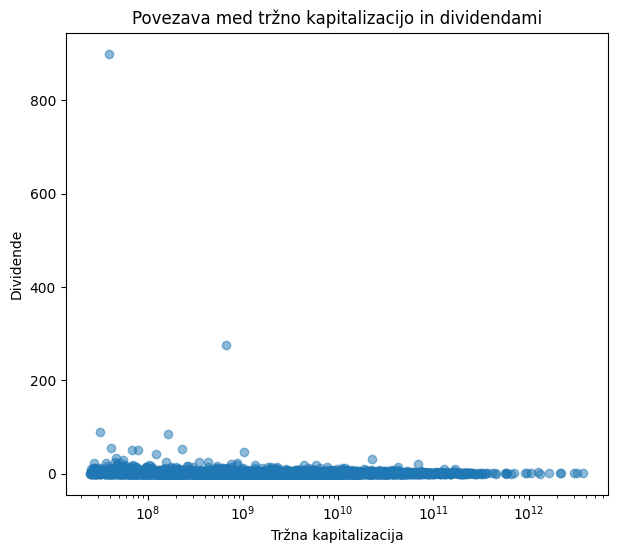

In [73]:
# pretvorimo podatke v številke in odstranimo neveljavne vrstice
podjetja["dividends"] = pd.to_numeric(podjetja["dividends"], errors="coerce")
podjetja_div = podjetja.dropna(subset=["marketcap", "dividends"])

plt.figure(figsize=(7,6))
plt.scatter(podjetja_div["marketcap"], podjetja_div["dividends"], alpha=0.5)
plt.xlabel("Tržna kapitalizacija")
plt.ylabel("Dividende")
plt.xscale("log")
plt.title("Povezava med tržno kapitalizacijo in dividendami")
plt.show()

Iz grafa težko kaj razberemo, zato odstranimo tisti dve podjetij z največjimi dividendami, da bo graf bolj pregleden.

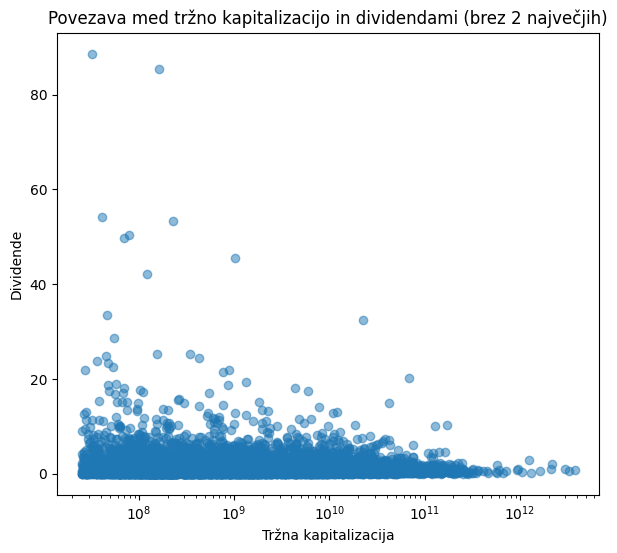

In [74]:
podjetja["dividends"] = pd.to_numeric(podjetja["dividends"], errors="coerce")
podjetja_div = podjetja.dropna(subset=["marketcap", "dividends"])
# odstrani 2 podjetji z največjimi dividendami
podjetja_div = podjetja_div.sort_values("dividends", ascending=False).iloc[2:]

plt.figure(figsize=(7,6))
plt.scatter(podjetja_div["marketcap"], podjetja_div["dividends"], alpha=0.5)
plt.xlabel("Tržna kapitalizacija")
plt.ylabel("Dividende")
plt.xscale("log")
plt.title("Povezava med tržno kapitalizacijo in dividendami (brez 2 največjih)")
plt.show()

Graf nakazuje, da večja podjetja načeloma izdajajo manjše dividende. Izglede, da precej majhne dividende izdajajo največja trilijonska podjetja. Možen razlog za to je, da hočejo čim več vlagat nazaj vase in s tem še bolj rasti.

## Kazalnik P/E
V svetu investiranja v delnice načeloma velja, da je v podjetja s visokim kazalnikom P/E riskantno vlagati, saj lahko to nakazuje, da je cena delnice napihnjena glede na dejanski dobiček podjetja in da vlagatelji pričakujejo visoko rast dobička v prihodnosti, kar pa ni vedno zagotovljeno.

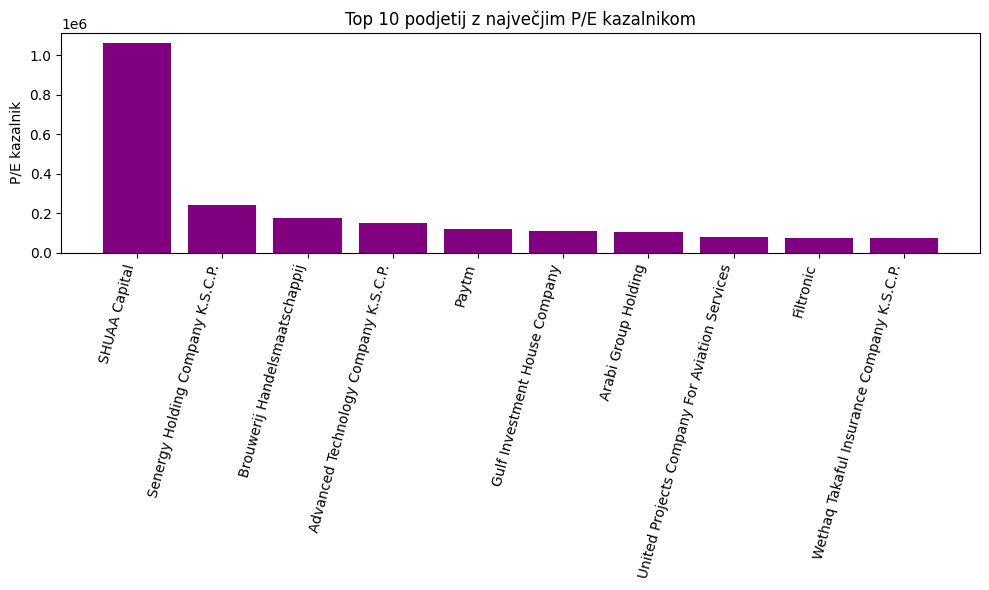

In [92]:
top_pe = podjetja.sort_values("pe_ratio", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_pe["name"], top_pe["pe_ratio"], color="purple")
plt.xticks(rotation=75, ha="right")
plt.ylabel("P/E kazalnik")
plt.title("Top 10 podjetij z največjim P/E kazalnikom")
plt.tight_layout()
plt.show()

Če hočete vstopit v svet delnic se mogoče raje izognite takih podjetij.